In [2]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [3]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_iris, test_size=0.2, random_state=0)

X_train = train_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X_test = test_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

y_train = train_df['label']
y_test = test_df['label']

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

k_best = 0
score_best = 0

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    
    if score > score_best:
        score_best=score
        k_best = i
    
    print('K = {}, score = {}'.format(i, score))
    
print ('\nThe best k = {} , score = {}'.format(k_best,score_best ))

K = 1, score = 0.9333333333333333
K = 2, score = 0.9666666666666667
K = 3, score = 0.9666666666666667
K = 4, score = 0.9666666666666667
K = 5, score = 1.0
K = 6, score = 1.0
K = 7, score = 1.0
K = 8, score = 1.0
K = 9, score = 1.0
K = 10, score = 1.0
K = 11, score = 1.0
K = 12, score = 1.0
K = 13, score = 1.0
K = 14, score = 1.0
K = 15, score = 1.0
K = 16, score = 1.0
K = 17, score = 1.0
K = 18, score = 1.0
K = 19, score = 0.9666666666666667
K = 20, score = 0.9666666666666667
K = 21, score = 0.9
K = 22, score = 0.8666666666666667
K = 23, score = 0.8666666666666667
K = 24, score = 0.9
K = 25, score = 0.9
K = 26, score = 0.9
K = 27, score = 0.9
K = 28, score = 0.9
K = 29, score = 0.9

The best k = 5 , score = 1.0


## Synthetic dataset  

<IPython.core.display.Javascript object>


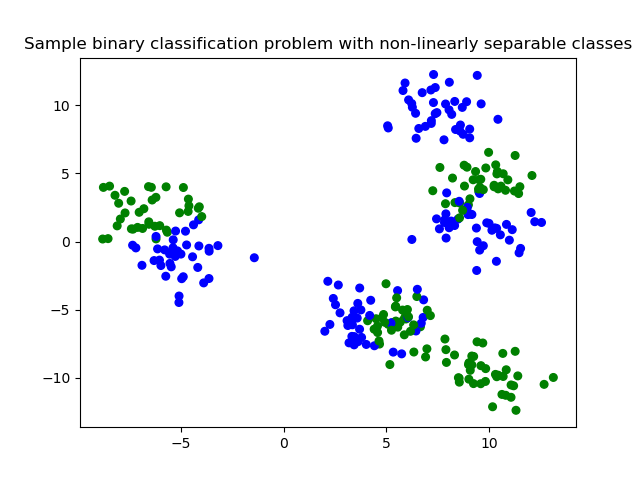

In [25]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=30, cmap=cmap_bold)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=0)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

score_best = 0
k_best = 0

for i in range(1,30):
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train_scaled, y_train)
    score = knn_reg.score(X_test_scaled, y_test)
    
    if score > score_best:
        k_best = i
        score_best = score
        
    print('K = {}, score = {}'.format(i, score))

print ('\nThe best k = {} , score = {}'.format(k_best,score_best ))

K = 1, score = 0.7321428571428572
K = 2, score = 0.7154017857142858
K = 3, score = 0.7172619047619049
K = 4, score = 0.7154017857142858
K = 5, score = 0.7080357142857143
K = 6, score = 0.7507440476190477
K = 7, score = 0.7499088921282799
K = 8, score = 0.7593470982142858
K = 9, score = 0.7478505291005291
K = 10, score = 0.7495535714285715
K = 11, score = 0.7526195395513579
K = 12, score = 0.7502790178571429
K = 13, score = 0.7563133981403213
K = 14, score = 0.752300473760933
K = 15, score = 0.7461309523809524
K = 16, score = 0.7517613002232144
K = 17, score = 0.7553138902619871
K = 18, score = 0.7575644841269842
K = 19, score = 0.7449421250494659
K = 20, score = 0.740513392857143
K = 21, score = 0.7392796404275996
K = 22, score = 0.7277154663518302
K = 23, score = 0.7254337699162842
K = 24, score = 0.7134254092261906
K = 25, score = 0.70225
K = 26, score = 0.6936086749788675
K = 27, score = 0.688510435038213
K = 28, score = 0.6736345207725949
K = 29, score = 0.661197341600136

The best

<IPython.core.display.Javascript object>


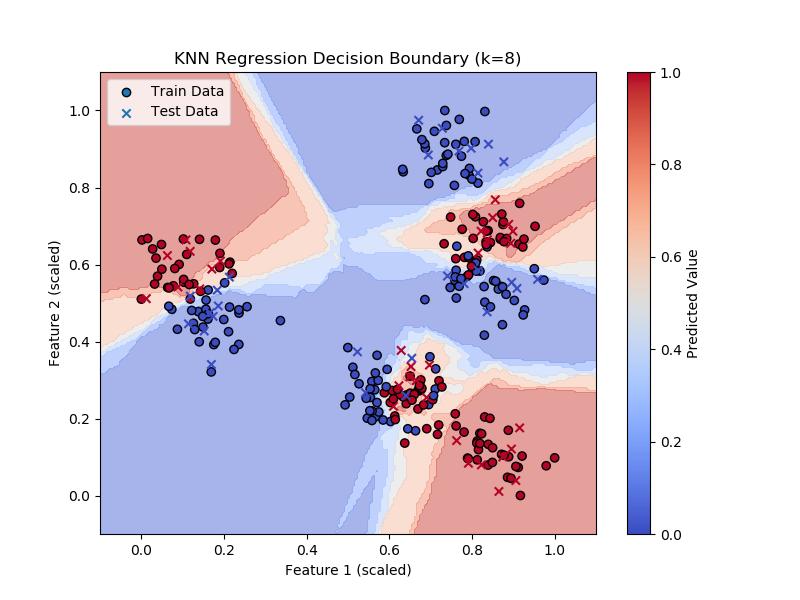

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X_train_scaled[:, 0].min() - 0.1, X_train_scaled[:, 0].max() + 0.1
y_min, y_max = X_train_scaled[:, 1].min() - 0.1, X_train_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

knn_best = KNeighborsRegressor(n_neighbors=k_best)
knn_best.fit(X_train_scaled, y_train)

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  # Фонова область
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', cmap='coolwarm', label='Train Data')  # Навчальні точки
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, marker='x', cmap='coolwarm', label='Test Data')  # Тестові точки
plt.colorbar(label="Predicted Value")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title(f"KNN Regression Decision Boundary (k={k_best})")
plt.legend()
plt.show()
